# Occupation Data for Residents on Voters List in Region One
# Occupation - normalized job title defined in a competency framework. 
# Clustering

In [1]:
# Reading the CSV into a pandas DataFrame is quick and straightforward:
import pandas

import itertools

import os

import numpy as np

# Import the random module
import random

# Import destance module from SciPy
from scipy.spatial import distance

# Import pyplot from matplotlib
from matplotlib import pyplot as plt

# Import regular expressions
import re

# Import CSV
import csv

# Import figure module from matplotlib
from matplotlib.pyplot import figure

# Import collections
from collections import defaultdict

# Import pyplot from matplotib
from matplotlib import pyplot as pltx

import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans

from sklearn.metrics import pairwise_distances_argmin

from statistics import stdev

from statistics import mean 

In [161]:
# Using Pandas, select only the 4 colums of interest

fields = ["Number", "Surname", "Firstname", "Address", "Occupation", "Idnumber"]

# Read only the desired fields into memory
dataframe = pandas.read_csv("District 01.csv", skipinitialspace=True, usecols=fields)

# The data in its unmodified form
print(dataframe.columns)
print(dataframe.size)
print(dataframe.shape)
print(dataframe.shape[0])
# Print the head of the data
print(dataframe.head())

# Describe the data
print(dataframe.describe())

# Print the data - Uncomment to observe
#print(dataframe)

Index(['Number', 'Surname', 'Firstname', 'Address', 'Occupation', 'Idnumber'], dtype='object')
169320
(28220, 6)
28220
  Number   Surname Firstname   Address Occupation   Idnumber
0      1  resident  resident  resident      MINER  157304610
1      2  resident  resident  resident     FARMER  130162652
2    NaN  resident  resident  resident        NaN        NaN
3      3  resident  resident  resident          -  151427089
4      4  resident  resident  resident          -  147029982
       Number   Surname Firstname   Address Occupation   Idnumber
count   17947     28220     28220     28220      17914      17915
unique   2076         1         1         1        368      17893
top         3  resident  resident  resident          -  ID Number
freq       57     28220     28220     28220       8022          3


In [162]:
# Clean the data 
def divide_data (dataset):
    # Create an empty list to hold the columns of the dataframe
    columns = list()
    
    # Create a regular expression to look for only the target month
    pattern = re.compile('nan')

    # Iterating the columns 
    for col in dataset.columns: 
        columns.append(col)

    # Create empty dataframe
    sample = pandas.DataFrame(columns=columns)
    
    # Select a sample size (# of rows) based on the ratio
    n_sample = round(dataset)
    
    #print("n_sample = ",n_sample)

    # Create a sample set
    while sample.shape[0] < len(n_sample):
        # The randrange() function from the random module is used to select a random row index to add
        # to the sample each iteration of the loop.
        index = random.randrange(dataset.shape[0])
        
        sample = sample.append(dataset.iloc[index])
    
    return sample

In [163]:
testSetBagging = divide_data(dataframe)

# Create an empty list to hold the columns of the dataframe
columns = list()

# Iterating the columns 
for col in testSetBagging.columns: 
    columns.append(col)

# Look for only the target month
pattern = re.compile('nan')

# Create empty dataframe
sample = pandas.DataFrame(columns=columns)

# Iterate through the raw dataset
for index in range(testSetBagging.shape[0]):

    match1 = pattern.match(str(testSetBagging.iloc[index,1]))

    match2 = pattern.match(str(testSetBagging.iloc[index,2]))
    
    match3 = pattern.match(str(testSetBagging.iloc[index,3]))
    
    match4 = pattern.match(str(testSetBagging.iloc[index,4]))

    match5 = pattern.match(str(testSetBagging.iloc[index,5]))

    # Filter out days with a negative value in any of the attributes
    if((not match1) and (not match2) and (not match3) and (not match4) and (not match5)):
        # Append the data corresponding to the randomly selected index in the dataframe.
        sample = sample.append(testSetBagging.iloc[index])

#print(sample)
sample.sort_index(inplace=True)

# Create a new index by assigning the current range to the index attribute
sample.index = range(len(sample))

print(sample)

ocuid = sample.loc[:,"Occupation":"Idnumber"]
print(ocuid)

      Number   Surname Firstname   Address Occupation   Idnumber
0          2  resident  resident  resident     FARMER  130162652
1          3  resident  resident  resident          -  151427089
2          4  resident  resident  resident          -  147029982
3          4  resident  resident  resident          -  147029982
4          6  resident  resident  resident          -  159952031
...      ...       ...       ...       ...        ...        ...
17785     98  resident  resident  resident       COOK  160428592
17786     99  resident  resident  resident     FARMER  150161433
17787    100  resident  resident  resident          -  160529763
17788    101  resident  resident  resident          -  160529375
17789    102  resident  resident  resident      MINER  152530270

[17790 rows x 6 columns]
      Occupation   Idnumber
0         FARMER  130162652
1              -  151427089
2              -  147029982
3              -  147029982
4              -  159952031
...          ...        ..

In [164]:
#testSetBagging = divide_data(dataframe)
print(testSetBagging.columns)
print(testSetBagging.size)
print(testSetBagging.shape)
print(sample.shape[0])
#print(testSetBagging)
#print with all values as compared to cleaned above
#testSetBagging.sort_index(inplace=True)
#print(testSetBagging)

Index(['Number', 'Surname', 'Firstname', 'Address', 'Occupation', 'Idnumber'], dtype='object')
169320
(28220, 6)
17790


In [165]:
# Determine occupation by identification 
ocuocu = list() 
ocuocu = sample.loc[:,"Occupation"]
ocuid = list()
ocuid = sample.loc[:,"Idnumber"]

zipobj = zip(ocuid, ocuocu)
dicofper = dict(zipobj)
dicofper
#print(ocuid)
#print(ocuocu)

{'130162652': 'FARMER',
 '151427089': '-',
 '147029982': '-',
 '159952031': '-',
 '167457115': '-',
 '159945726': 'FARMER',
 '167005289': '-',
 '157324495': '-',
 '166446375': '-',
 '166034125': 'MINER',
 '130162555': 'HOUSEWIFE',
 '130164495': 'FARMER',
 '157324301': 'MINER',
 '151390714': '-',
 '150844119': '-',
 '168517519': '-',
 '165233584': '-',
 '119043736': '-',
 '130836026': 'HOUSEWIFE',
 '159953001': '-',
 '131040987': 'FARMER',
 '145584682': '-',
 '167549847': '-',
 '152920307': '-',
 '164395407': '-',
 '163312305': '-',
 '140407307': '-',
 '140407210': '-',
 '130834086': '-',
 '140407404': 'MINER',
 '100278601': 'MINER',
 '167300557': '-',
 '130835056': 'MINER',
 '161398301': 'MINER',
 '161398204': '-',
 '100256194': '-',
 '164398996': 'MINER',
 '157304901': 'OPERATOR',
 '159952613': '-',
 '130835541': 'HOUSEWIFE',
 '163954445': '-',
 '151426992': '-',
 '166784420': '-',
 '140409538': '-',
 '159471784': '-',
 '130835444': 'OPERATOR',
 '100256582': 'TEACHER',
 '167043410': '

In [166]:
# Count the number of each unique occupation - without regard for identification in Dictionary

from collections import Counter
count_occupation = Counter(ocuocu)
#Show count of each occupation
print(count_occupation)
#identification in Dictionary
X = [[count_occupation.keys(), count_occupation.values()]]
#X

Counter({'-': 7980, 'FARMER': 3021, 'MINER': 1825, 'HOUSEWIFE': 912, 'LABOURER': 434, 'TEACHER': 391, 'HOUSEKEEPER': 317, 'CARPENTER': 242, 'BUSINESSMAN': 194, 'FISHERMAN': 184, 'COOK': 132, 'DRIVER': 132, 'OPERATOR': 124, 'SECURITY GUARD': 101, 'MECHANIC': 96, 'BUSINESSWOMAN': 89, 'SAW OPERATOR': 67, 'MASON': 57, 'LOGGER': 48, 'SALES CLERK': 47, 'SHOPKEEPER': 46, 'HEALTH WORKER': 41, 'CHAINSAW OPER.': 37, 'HOUSE KEEPER': 37, 'PORTER': 36, 'DOMESTIC': 35, 'CLEANER': 34, 'VENDOR': 33, 'SURVEYOR': 27, 'SEAMSTRESS': 27, 'WELDER': 26, 'SALESMAN': 24, 'NURSE': 21, 'CHAIN SAW OPER.': 20, 'HOUSE-KEEPER': 18, 'CLERK': 18, 'PORK KNOCKER': 18, 'JOINER': 17, 'SHOP KEEPER': 16, 'BOAT CAPTAIN': 15, 'DOMESTIC WORKER': 15, 'CONDUCTOR': 14, 'OUTBOARD OPER.': 14, 'POLICE': 13, 'MAID': 13, 'ELECTRICIAN': 13, 'SUPERVISOR': 12, 'SEAMAN': 12, 'ACCOUNTANT': 12, 'BARBER': 12, 'SALESGIRL': 12, 'ACCOUNTS CLERK': 12, 'NONE': 11, 'TAILOR': 11, 'STEVEDORE': 11, 'CHARWOMAN': 11, 'MANAGER': 10, 'HOMEMAKER': 10, 'BO

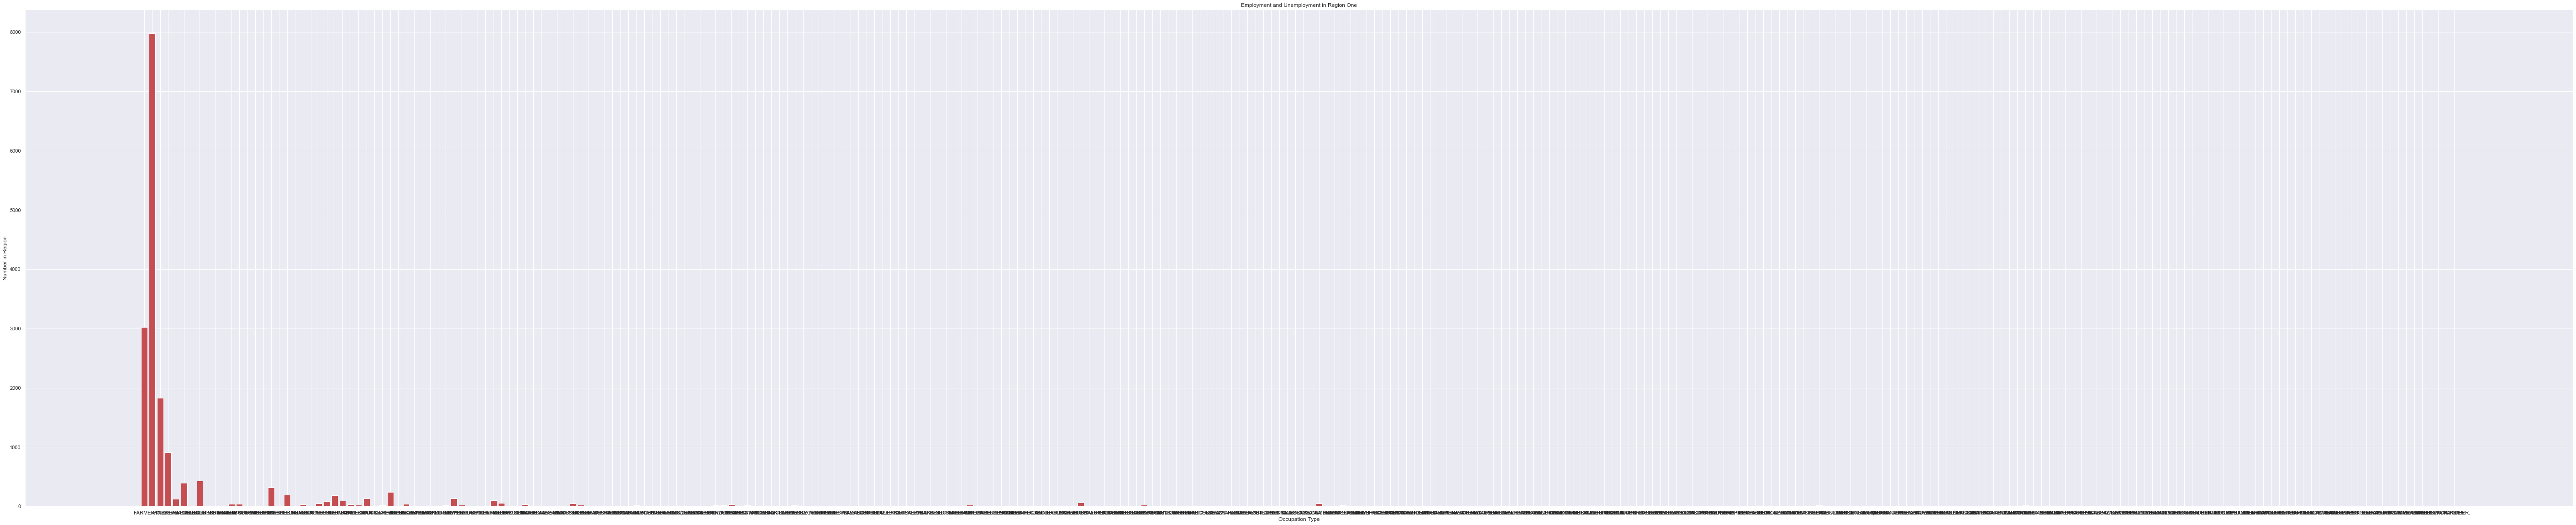

In [167]:
# Bar graph of occupation without regard for identification 
pltx.figure(figsize=(100,20))
pltx.bar(range(len(count_occupation)), list(count_occupation.values()), align = 'center', color = 'r')
pltx.xticks(range(len(count_occupation)), list(count_occupation.keys()))
pltx.xlabel("Occupation Type")
pltx.ylabel("Number in Region")
pltx.title("Employment and Unemployment in Region One")
pltx.savefig('Region_One_BarPlot.png')
pltx.show()

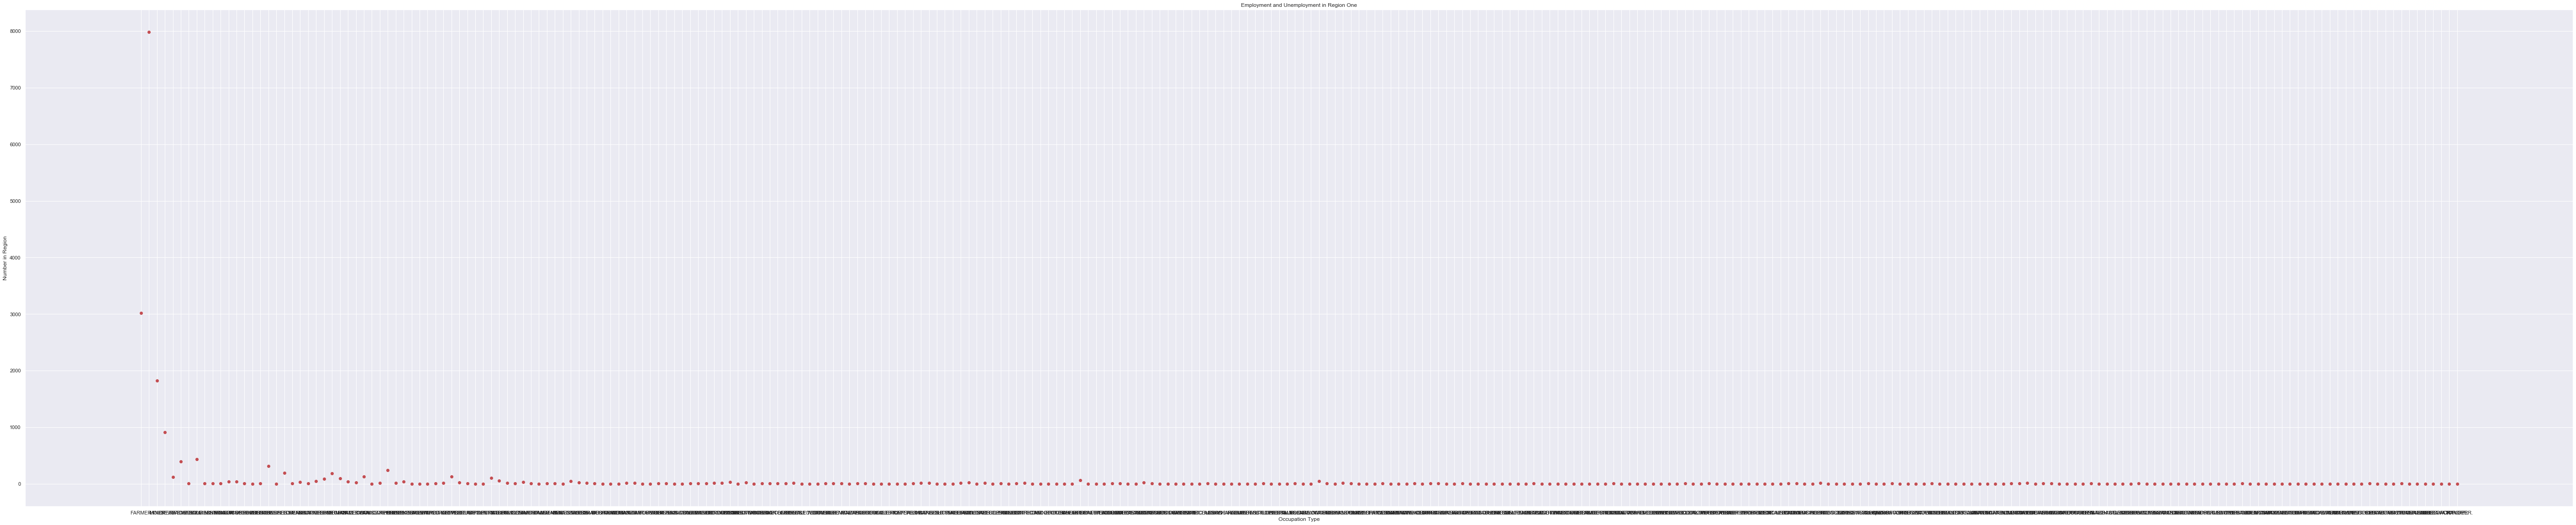

In [168]:
# Scatter plot of occupation without regard for identification 
pltx.figure(figsize=(100,20))
pltx.scatter(range(len(count_occupation)), list(count_occupation.values()), color = 'r')
pltx.xticks(range(len(count_occupation)), list(count_occupation.keys()))
pltx.xlabel("Occupation Type")
pltx.ylabel("Number in Region")
pltx.title("Employment and Unemployment in Region One")
pltx.savefig('Region_One_ScatterPlot.png')
pltx.show()

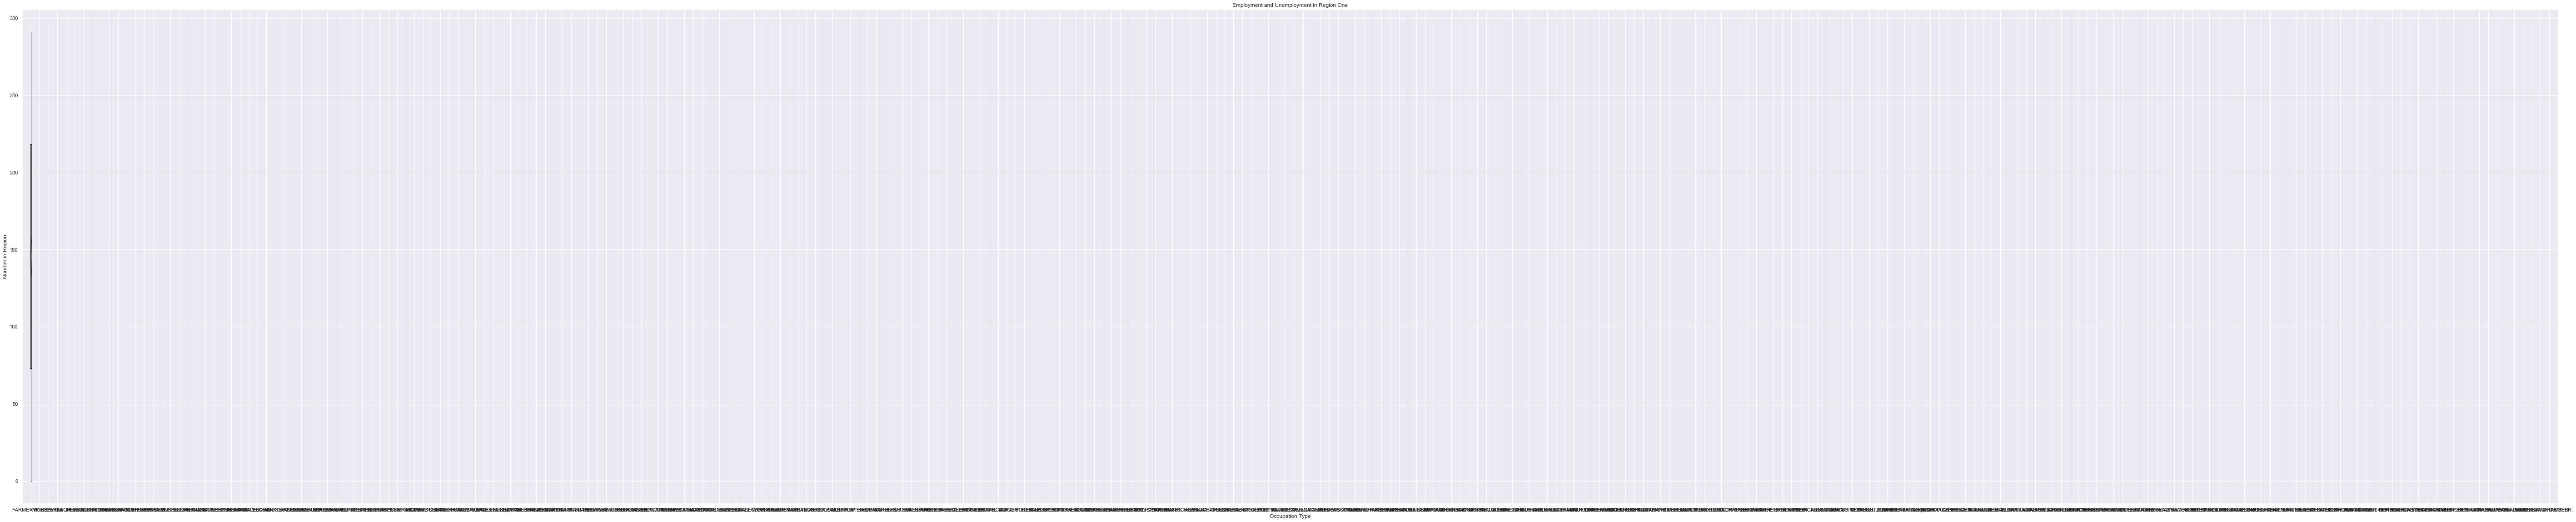

In [169]:
# Bar plot of occupation without regard for identification 
pltx.figure(figsize=(100,20))
pltx.boxplot(range(len(count_occupation)), list(count_occupation.values()))
pltx.xticks(range(len(count_occupation)), list(count_occupation.keys()))
pltx.xlabel("Occupation Type")
pltx.ylabel("Number in Region")
pltx.title("Employment and Unemployment in Region One")
pltx.savefig('Region_One_BoxPlot.png')
pltx.show()

C:\Users\Dustin\Miniconda3\envs\r_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  


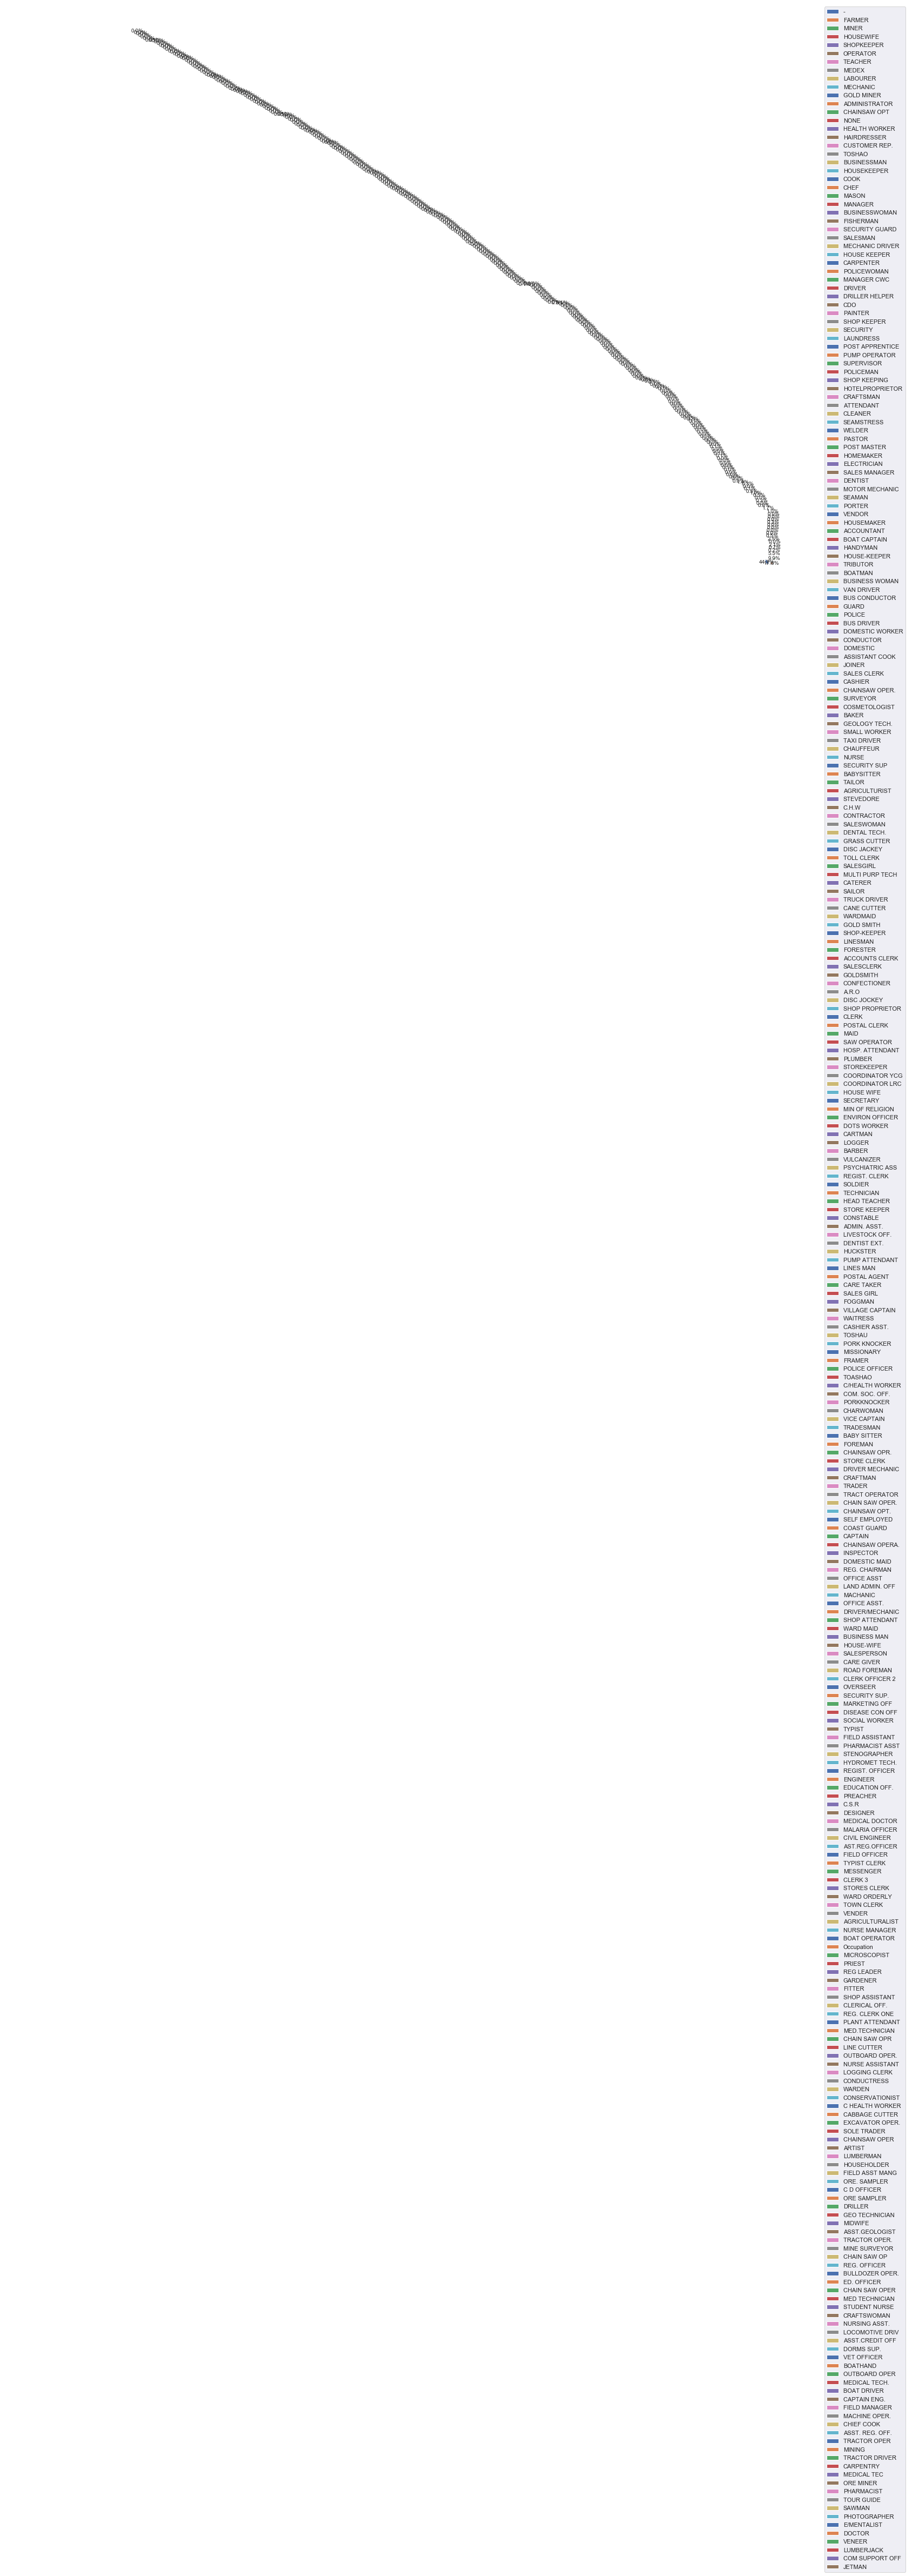

In [61]:
# Plot a text graph
# Bar plot of occupation without regard for identification 
pltx.figure(figsize=(30,20))
pltx.pie(list(count_occupation.values()), range(len(count_occupation)), autopct = '%1.1f%%', shadow=True, startangle=140)
#pltx.savefig('Region_One_piePlot.png')
pltx.legend( list(count_occupation.keys()), loc="best")
pltx.axis('equal')
#pltx.tight_layout()
pltx.show()

# Clustering - helps understand the data in a unique way – by grouping them together into clusters.

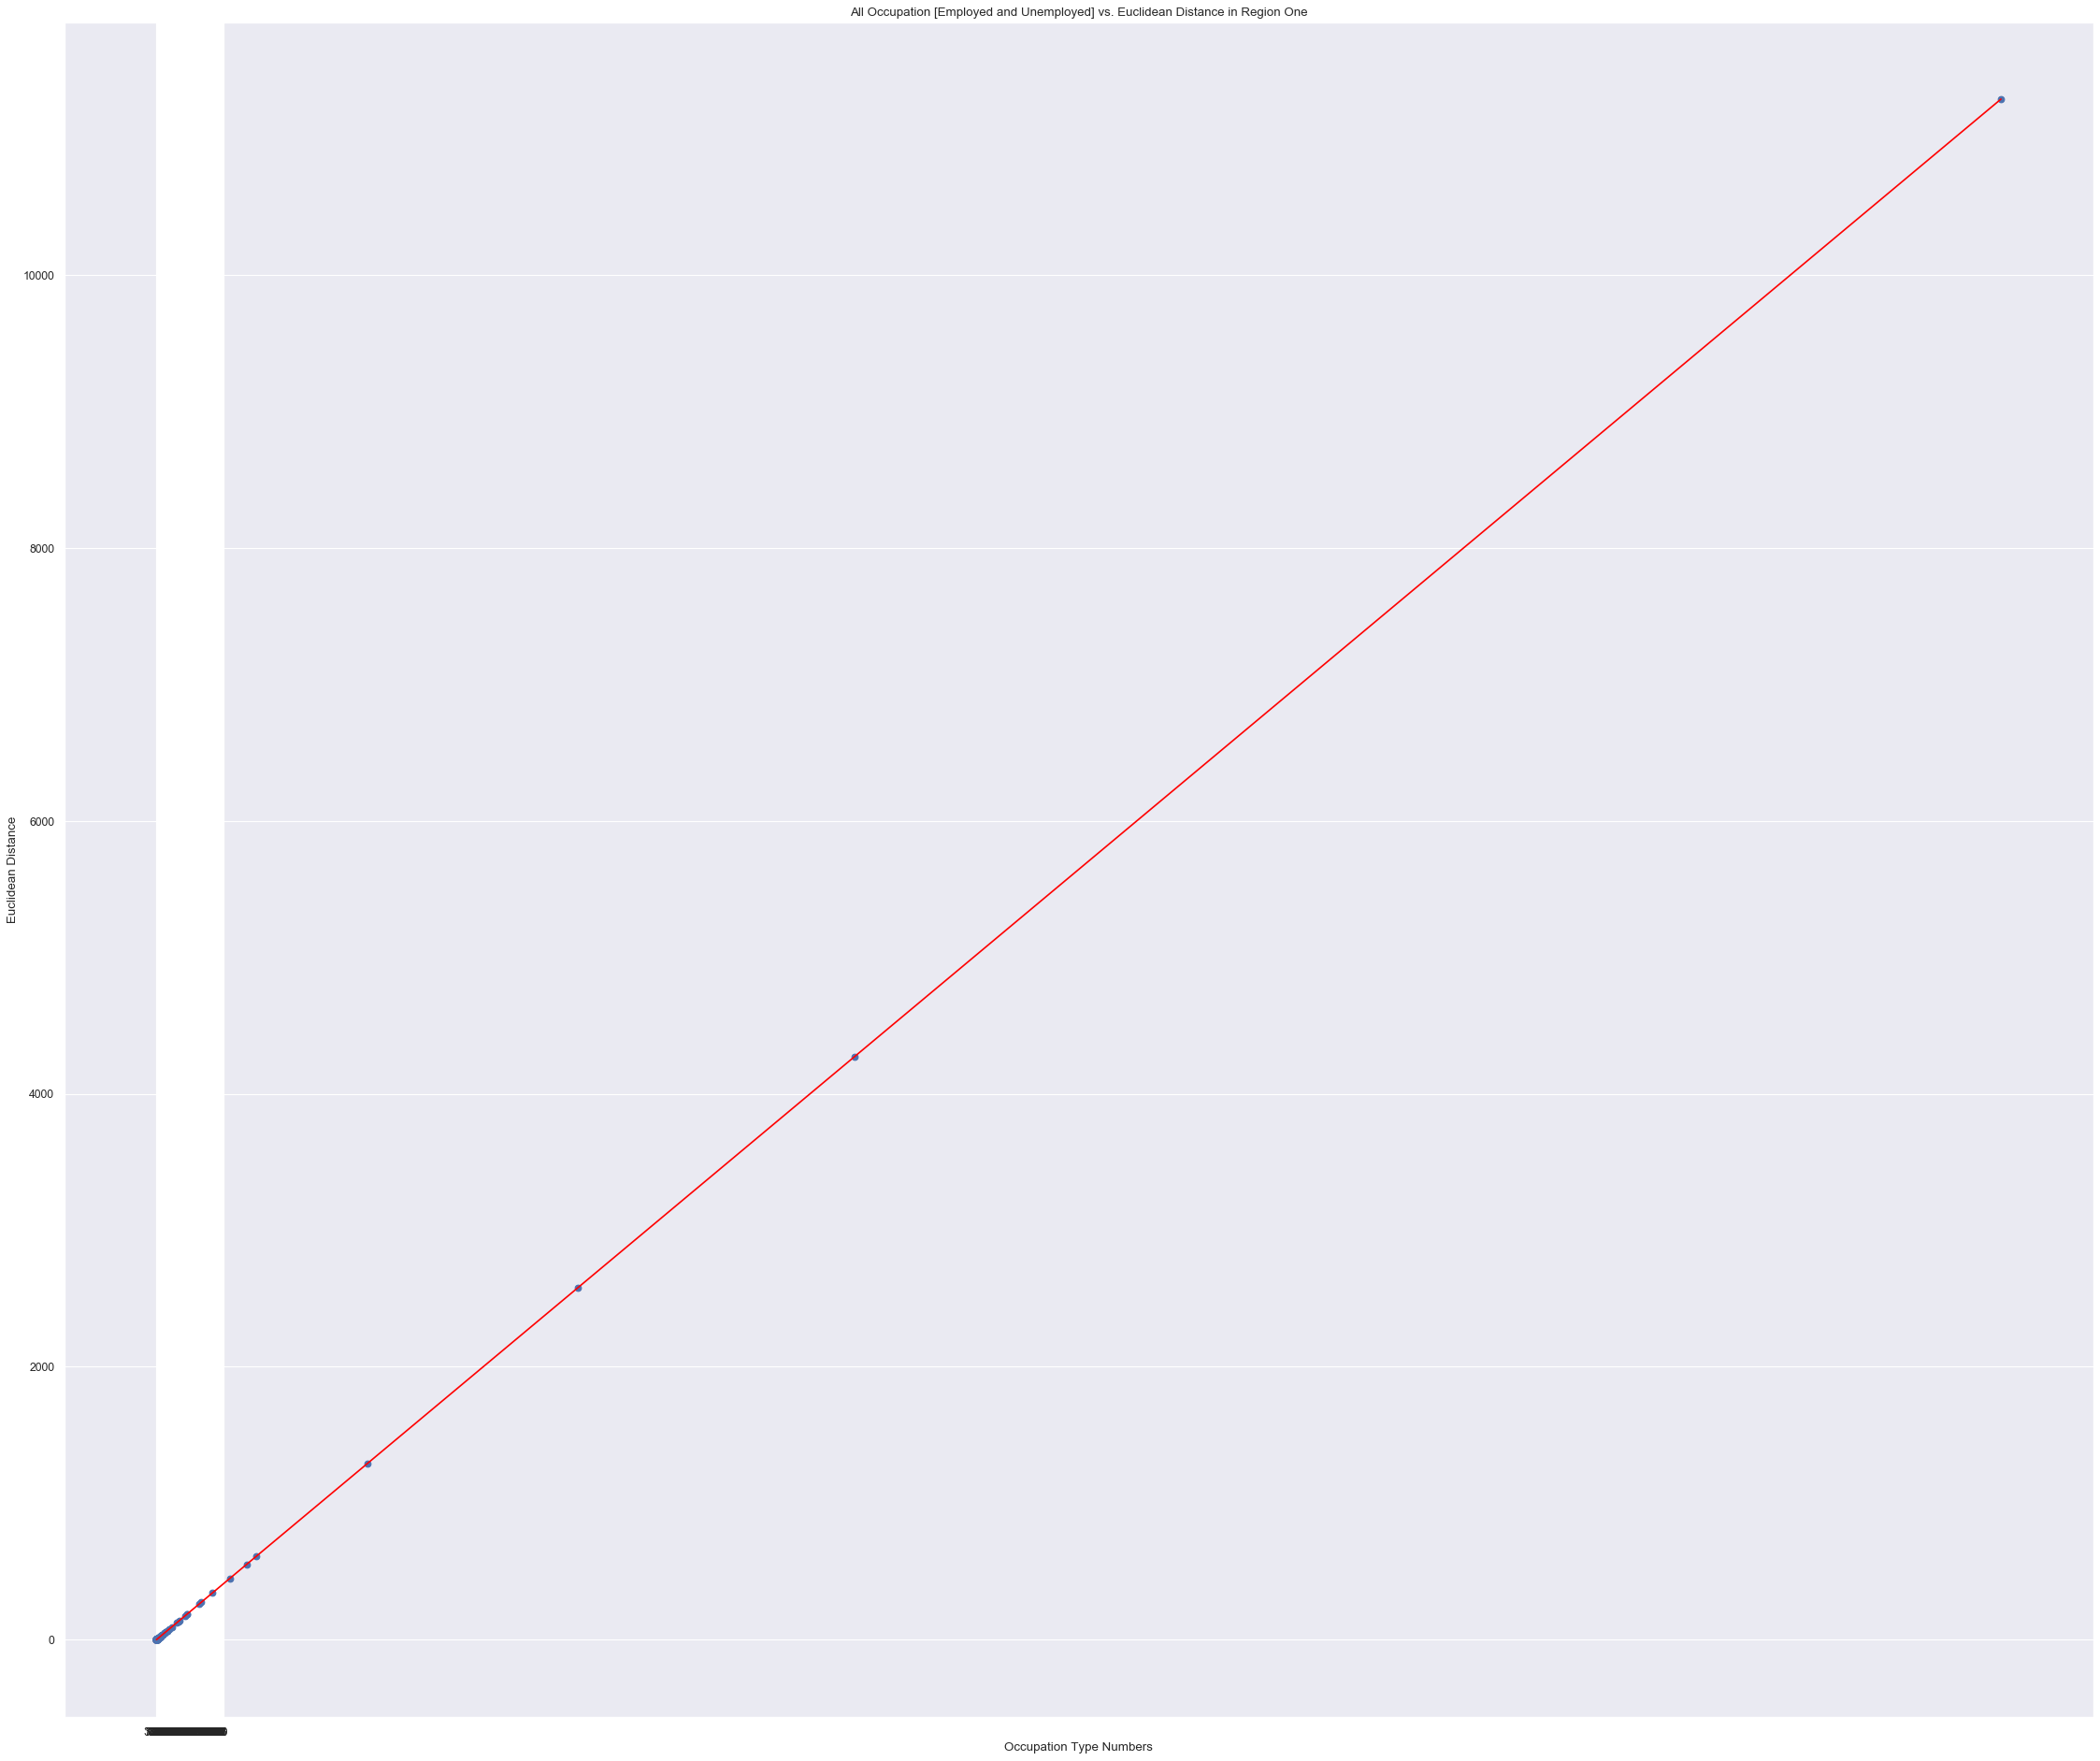

In [170]:
# The Approach

# Create lists to hold data for visualization
testSetDistances = list()
testSetoccup_num = list()

# Compute distances using bagging sample list(count_occupation.values())
for value in sorted(list(count_occupation.values())):
    point = [value]
    testSetDistances.append(distance.euclidean([0,0], point))
    testSetoccup_num.append(value)
    #print(value) #This tests the values in the set
    
# Make figures larger
figure(num=None, figsize=(35, 30), dpi=80, facecolor='w', edgecolor='k')

# Plot the data
pltx.scatter(testSetoccup_num, testSetDistances)
pltx.xticks(range(len(count_occupation)), list(count_occupation.values()))
# Plot the prediction line
pltx.plot([min(testSetoccup_num), max(testSetoccup_num)],[min(testSetDistances), max(testSetDistances)], color='red')
# Labels 
pltx.xlabel("Occupation Type Numbers")
pltx.ylabel("Euclidean Distance")
pltx.title("All Occupation [Employed and Unemployed] vs. Euclidean Distance in Region One")
pltx.savefig('Region_One_PredictScatterPlot.png')

# Plot chart
pltx.show()

In [64]:
X = np.zeros(shape=(len(testSetoccup_num),2))

# Propulate Pandas Dataframe for independent & dependent variables
for i in range(len(testSetoccup_num)):
    X[i] = [testSetoccup_num[i], testSetDistances[i]]

# Create the kmeans object with 4 clusters
kmeans = KMeans(n_clusters=4)

# Cluster the data
kmeans.fit(X)

# Predict the closest cluster each sample in X belongs to.
y_kmeans = kmeans.predict(X)

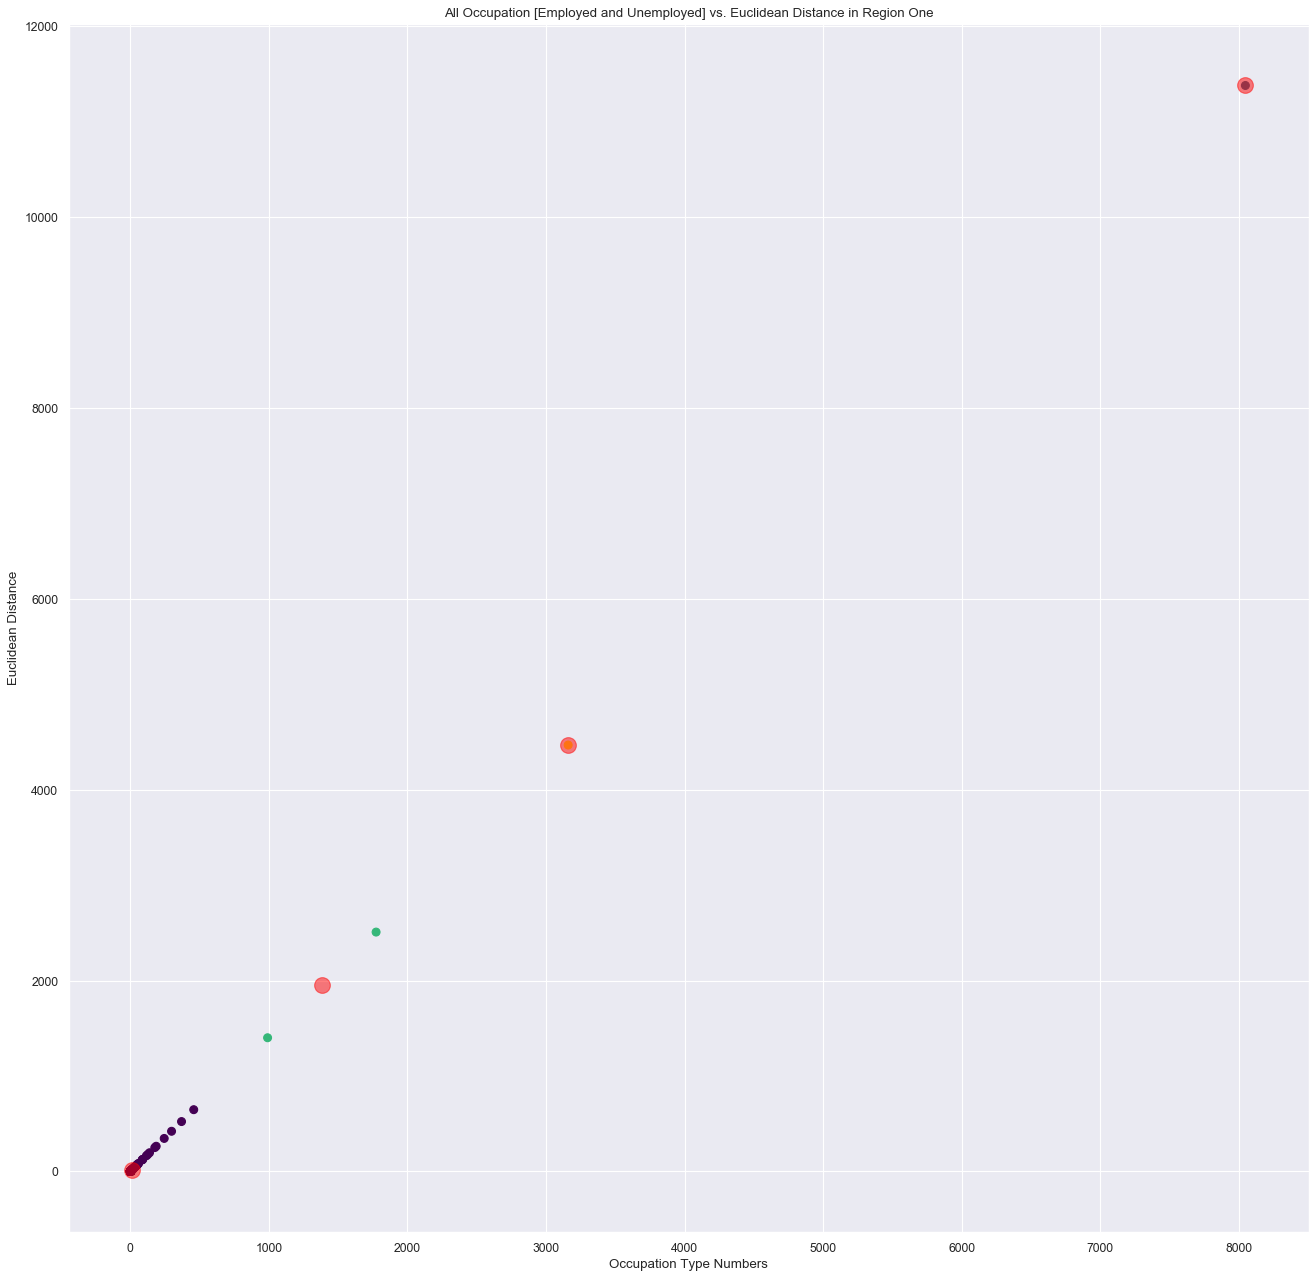

In [65]:
# Make figures larger
figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

# Add a label to the x-axis
# Add a label to the y-axis
# Add a title
pltx.xlabel("Occupation Type Numbers")
pltx.ylabel("Euclidean Distance")
pltx.title("All Occupation [Employed and Unemployed] vs. Euclidean Distance in Region One")
pltx.savefig('Region_One_ClusterScatterPlot.png')

# Plot chart
plt.show()

In [66]:
#print(y_kmeans)
#print(centers)
distanceMapFromCenter = ({}, {}, {}, {})
distancesFromCenter = ([], [], [], [])
outliers = ([], [], [], [])
distancesFromCenterExtremes = ({"max" : -1, "min" : 9999999999, "avg" : 0}, 
                               {"max" : -1, "min" : 9999999999, "avg" : 0}, 
                               {"max" : -1, "min" : 9999999999, "avg" : 0}, 
                               {"max" : -1, "min" : 9999999999, "avg" : 0})

for point_index in range(len(testSetoccup_num)):
    clusterID = y_kmeans[point_index]
    #print("clusterID =", clusterID)
    clusterCenter = centers[clusterID]
    #print("clusterCenter =", clusterCenter)
    point = (X[point_index, 0], X[point_index, 1])
    #print("point =", point)
    distanceFromCenter = distance.euclidean(clusterCenter, point)
    #print("distanceFromCenter =", distanceFromCenter)  
    distancesFromCenter[clusterID].append(distanceFromCenter)
    distanceMapFromCenter[clusterID].update({point_index : distanceFromCenter})
    #print(distancesFromCenter[clusterID])

# The code works until this point 
#---------------------------------------------------------------------------end

from statistics import stdev
from statistics import mean

for clusterID in range(len(centers)):
    distancesFromCenterExtremes[clusterID]["max"] = max(distancesFromCenter[clusterID])
    distancesFromCenterExtremes[clusterID]["min"] = min(distancesFromCenter[clusterID])
    distancesFromCenterExtremes[clusterID]["avg"] = mean(distancesFromCenter[clusterID])
    distancesFromCenterExtremes[clusterID]["std"] = round(stdev(distancesFromCenter[clusterID]),13)
   # print(distancesFromCenterExtremes[clusterID]["std"])
    
    boundary = round(3 * distancesFromCenterExtremes[clusterID]["std"],13)
 #---------------------------------------------------------------------------error with thestdev(distancesFromCenter[clusterID])
   
    for point_index, distanceFromCenter in distanceMapFromCenter[clusterID].items():
        if(distanceFromCenter > boundary):
            outliers[clusterID].append(point_index)
           # print(outliers[clusterID])

for clusterID in range(len(centers)):
    print("Cluster:", clusterID)
    print(" " + str(len(outliers[clusterID])) + " vs " + str(len(distanceMapFromCenter[clusterID])))

StatisticsError: variance requires at least two data points

In [67]:
def find_clusters(X, n_clusters, rseed=2):
    ## 1. Randomly choose clusters
    
    # Create random selection generator
    rng = np.random.RandomState(rseed)
    
    # Randomly select n_clusters number of indexes between 0 and the number of rows in X minus 1 
    i = rng.permutation(X.shape[0])[:n_clusters]
    #print(i)
    
    # Set centers to the values in the n_clusters number of indexes selected
    centers = X[i]
    print(centers)
    
    # Repeat until converged
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    print(centers)
    print(new_centers)

    return centers, labels

[[23.         32.52691193]
 [ 3.          4.24264069]
 [ 2.          2.82842712]
 [ 1.          1.41421356]]
[[8.04700000e+03 1.13801765e+04]
 [2.46700000e+03 3.48886486e+03]
 [4.72400000e+02 6.68074487e+02]
 [8.90604027e+00 1.25950429e+01]]
[[8.04700000e+03 1.13801765e+04]
 [2.46700000e+03 3.48886486e+03]
 [4.72400000e+02 6.68074487e+02]
 [8.90604027e+00 1.25950429e+01]]
[[8.04700000e+03 1.13801765e+04]
 [2.46700000e+03 3.48886486e+03]
 [4.72400000e+02 6.68074487e+02]
 [8.90604027e+00 1.25950429e+01]]


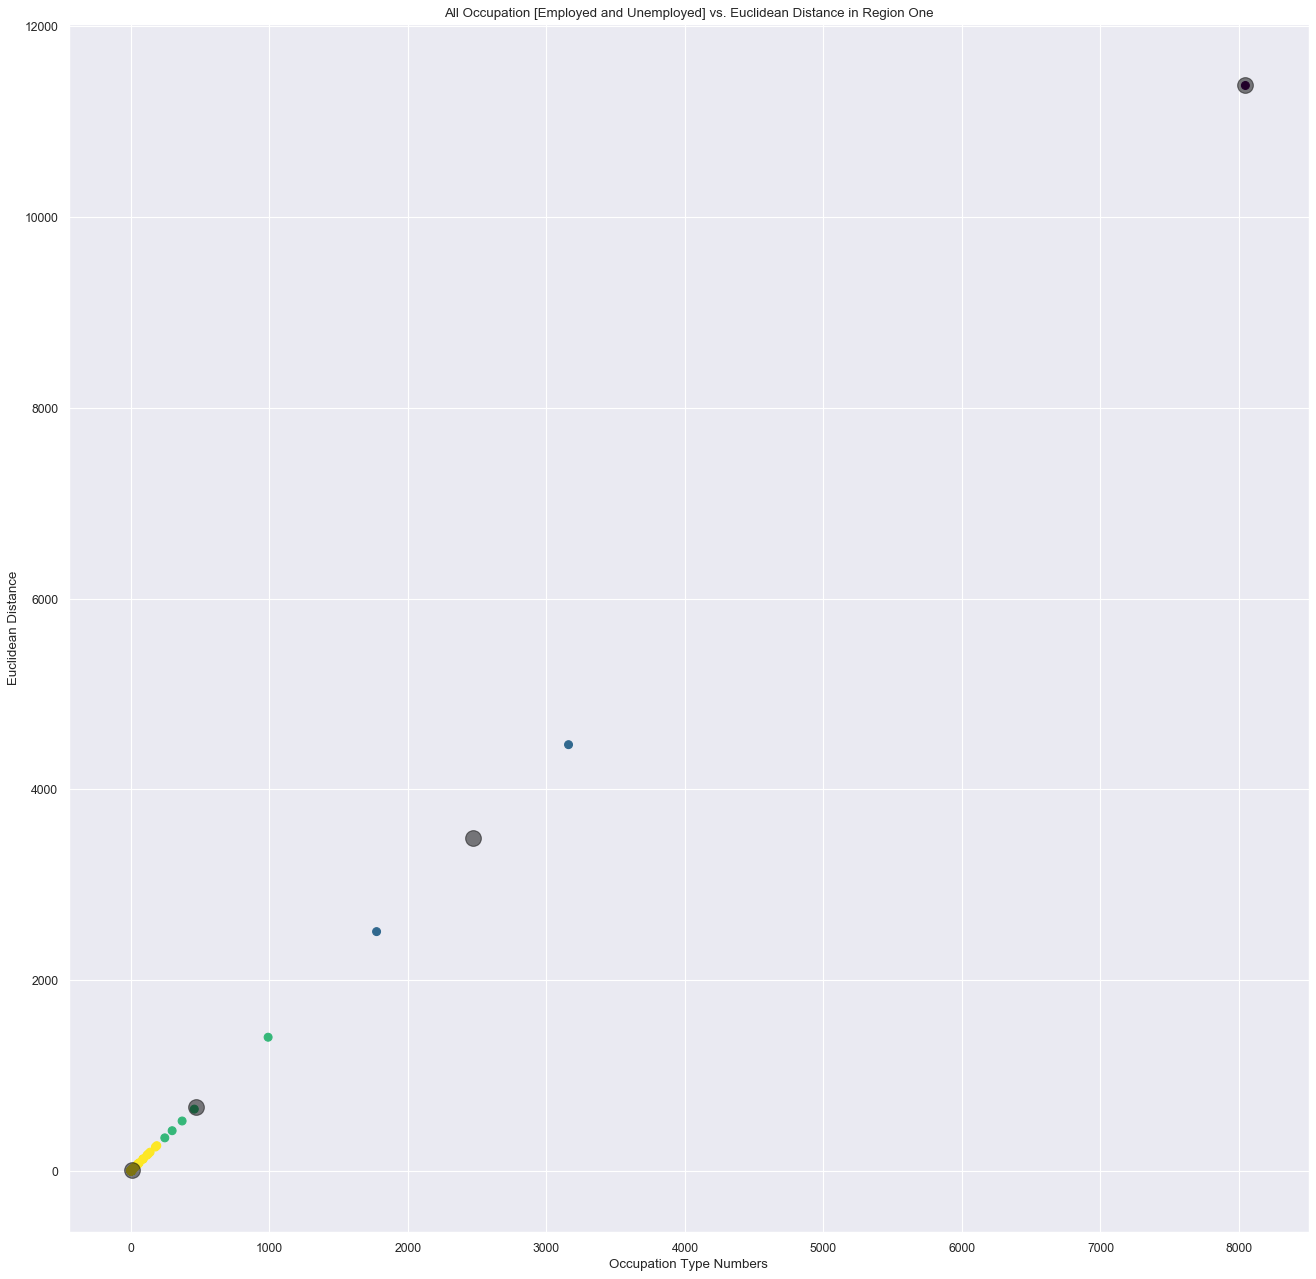

In [69]:
# Run our implementation on the data.
centers, labels = find_clusters(X, 4)
print(centers)
# Make figures larger
figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Add a label to the x-axis
# Add a label to the y-axis
# Add a title
pltx.xlabel("Occupation Type Numbers")
pltx.ylabel("Euclidean Distance")
pltx.title("All Occupation [Employed and Unemployed] vs. Euclidean Distance in Region One")
pltx.savefig('Region_One_PairWiseClusterScatterPlot.png')

# Plot chart
plt.show()

# Futher Analysis 

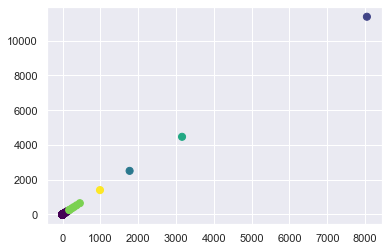

In [70]:
labels = KMeans(6, random_state=0).fit_predict(X)
pltx.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [71]:
y = X


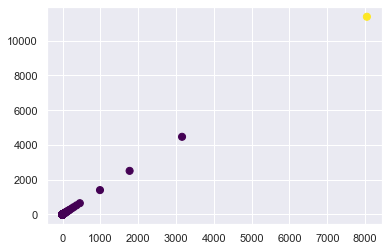

In [72]:
labels = KMeans(2, random_state=0).fit_predict(X)
pltx.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

C:\Users\Dustin\Miniconda3\envs\r_env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


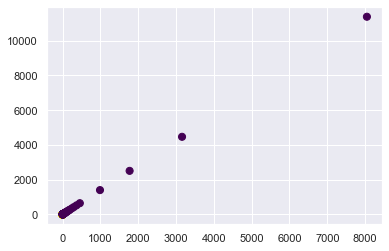

In [73]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
pltx.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [74]:
digits = X
digits.data.shape

(306, 2)

In [75]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 2)

ValueError: cannot reshape array of size 20 into shape (10,8,8)

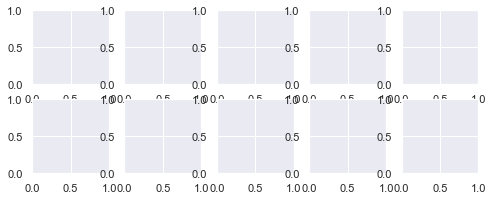

In [78]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
#https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
#https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# Silhouette Analysis 

#Selecting the number of clusters with silhouette analysis on KMeans clustering
#Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays #a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess #parameters like number of clusters visually. This measure has a range of[-1,1]

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.9882420593654799
For n_clusters = 3 The average silhouette_score is : 0.9802741330846176
For n_clusters = 4 The average silhouette_score is : 0.9721895747929298
For n_clusters = 5 The average silhouette_score is : 0.9326459512893296
For n_clusters = 6 The average silhouette_score is : 0.9343781759241325


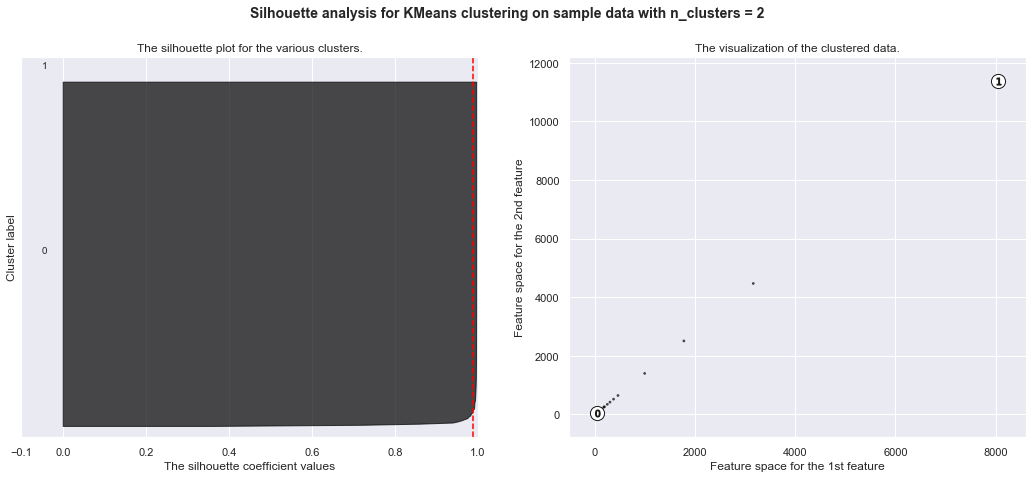

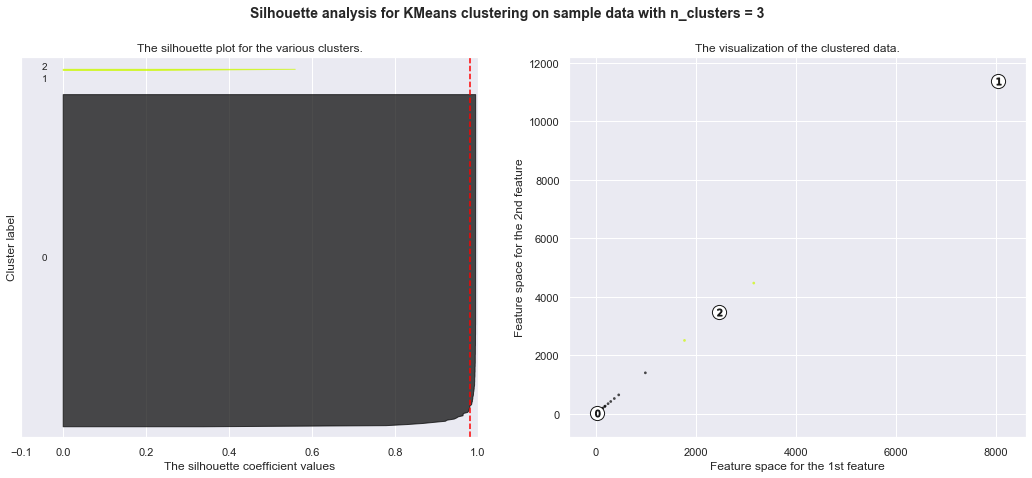

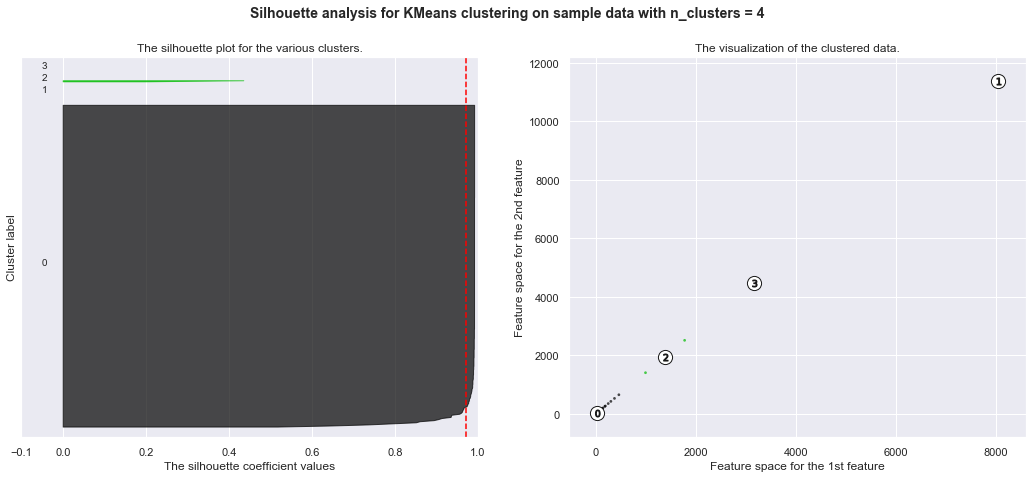

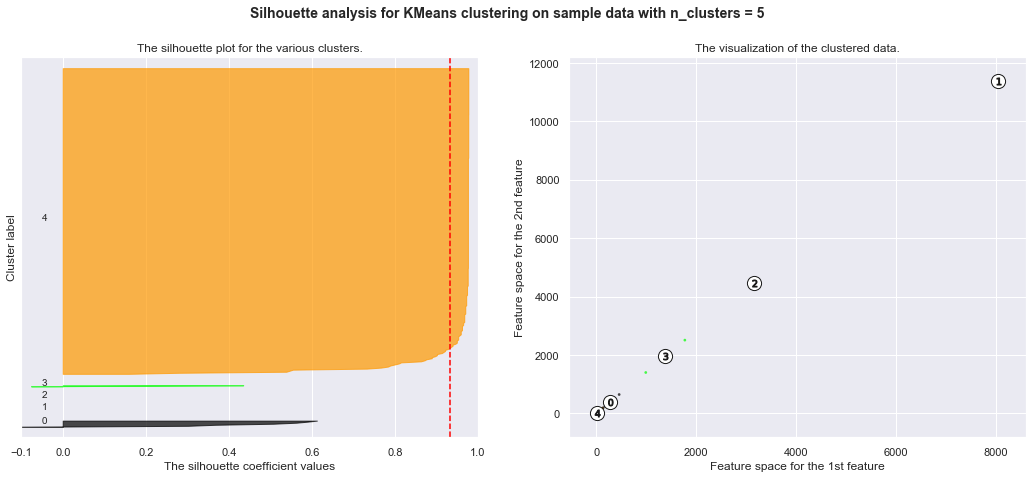

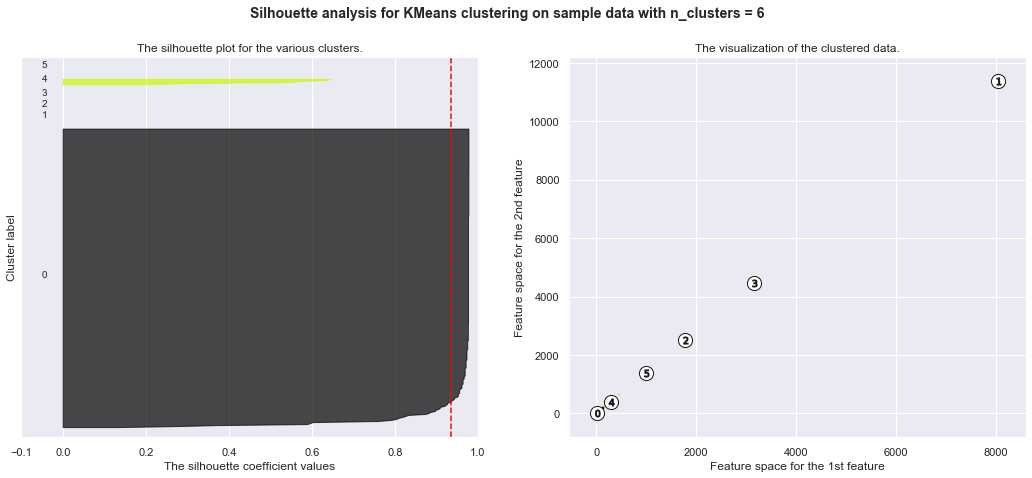

In [79]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

y = X  # For reproducibility print(y)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #Save the various cluster analysis
    plt.savefig("Region_One_Silhouette_score"+str(i)+".png")
plt.show()

# Appears that there should be 2 clusters based on the above analysis

# Simple Linear Regression
# Train the model - no quite need as yet 
# Better when multivariate data is added for context

In [125]:
# Split data 80% to training set and 20% to test 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), X.reshape(-1,1), test_size = 0.2, random_state = 0)
#data has a single feature or array.reshape(1, -1) <-- use as ^

In [126]:
#Train the data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
# Observe the coefficients that the model has chosen
coeff_df = pandas.DataFrame(regressor.coef_, X.reshape(1,-1), columns=['Coefficient'])
#coeff_df
#ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


In [140]:
#Prediction on changes to occupation types number data 
y_pred = [regressor.predict(X_test)]
#print(y_pred)

In [159]:
# check difference between the actual value and predicted value
df = pandas.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})
df1 = df.head(25)

print(df1['Actual'])
print(df1['Predicted'])

df1

0    [[86.2670273047588], [1.0], [17.0], [3.0], [1....
Name: Actual, dtype: object
0    [[[86.2670273047588], [0.999999999999986], [16...
Name: Predicted, dtype: object


,Actual,Predicted
0,"[[86.2670273047588], [1.0], [17.0], [3.0], [1....","[[[86.2670273047588], [0.999999999999986], [16..."
